# MXNet + Gluon + .... 

Yet another framework?  http://mxnet.incubator.apache.org/


Probably time to do something a little different this time.   This is getting bit dull.

This nifty diagram from https://towardsdatascience.com/battle-of-the-deep-learning-frameworks-part-i-cff0e3841750 explains it all

![title](img/battle-of-the-frameworks.png)




In [ ]:
# all the frameworks are the same..  <insert code here, but honestly its all same>

# get training data
# wrap into their own wrappers (tf.data or pytorch.tensor or mxnet.ND arrays etc) and figure out matrix orientation
# setup the model - n-layers, cnn, rnn, etc 
# define the loss function
# define the optimizer (GD, SGD, Ada etc)
# setup the visualization/printing of stats
# run training for n-epocs
# cross validation or test results



# Full stack solutions 

Courtesy of the gartner report (free on h2o.ai since they are the leader according to them).

The difference with what I call "full stack solutions" is that they offer:
- All in one stack
- Tools for loading data and doing basic ETL and Feature Engineering
- Automate hyper-parameter tuning for each model
- AutoML -- ie, select what you want (classification) and it runs every model and chooses the best one for you !
- Great visualization tools and dashboards

![title](img/gartner-diagram.jpg)

---

# Cloud Based ML Environments

The next group are cloud basic solutions:
 - Sony NN Console (dl.sony.com - really lame)
 - Azure ML Studio
 - Amazon Sagemaker
 - Google GCP w/ TensorFlow

 These integrate a mix of:
 - Tools for easier loading and training (Sony, Azure of graphical drag-n-drop network builders)
 - An API or set of builtin tools (Amazon offers their own + mxnet/gluon)
 - Cloud hosting for GPU/TPU (all above)
 - Some offer notebook integration (Azure)
 - Easy online provisioning and deployment to webservices etc (AWS, Azure)
 
 

In [1]:
import mxnet as mx
import numpy as np

fname = mx.test_utils.download('https://s3.us-east-2.amazonaws.com/mxnet-public/letter_recognition/letter-recognition.data')
data = np.genfromtxt(fname, delimiter=',')[:,1:]
label = np.array([ord(l.split(',')[0])-ord('A') for l in open(fname, 'r')])

batch_size = 32
ntrain = int(data.shape[0]*0.8)
train_iter = mx.io.NDArrayIter(data[:ntrain, :], label[:ntrain], batch_size, shuffle=True)
val_iter = mx.io.NDArrayIter(data[ntrain:, :], label[ntrain:], batch_size)

print ('data.shape', data.shape)

C:\Users\dougfoo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


data.shape (20000, 16)


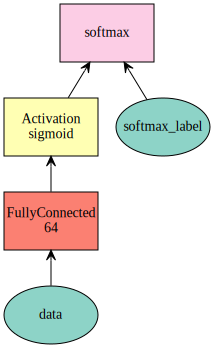

In [4]:
net = mx.sym.Variable('data')
net = mx.sym.FullyConnected(net, name='fc1', num_hidden=64)
net = mx.sym.Activation(net, name='sig1', act_type="sigmoid")
net = mx.sym.SoftmaxOutput(net, name='softmax')
mx.viz.plot_network(net)


In the end, I decided this framework and Gluon are like all the rest.. but the docs seem to have gaps and I had too much trouble getting it working!

So i gave up.  Time to move on.   Maybe I should try Keras real quick.

